# Business Case: Customer Analysis

## Cleaning Numerical Data

### Step 1 - Import libraries

In [1]:
# Importing common libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import statistics
import datetime

# Importing libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from matplotlib.colors import BASE_COLORS

# Importing libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

### Step 2 - Load .csv file into the variable customer_df and analysing main features

In [2]:
customer_df = pd.read_csv(r'C:\Users\galrodri\Documents\GitHub\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Step 3 - Formatting columns

In [5]:
customer_df.columns = map(lambda x: x.lower().replace("-", "_").replace(" ", "_"), customer_df.columns) # lowering headers

In [6]:
print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


### Step 5 - Data types

In [7]:
# checking data types for our dataset
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
# Modifying data type for Effective to Date
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [9]:
# Checking NaN values (step 10) and there are none
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Step 6 - Correlation matrix

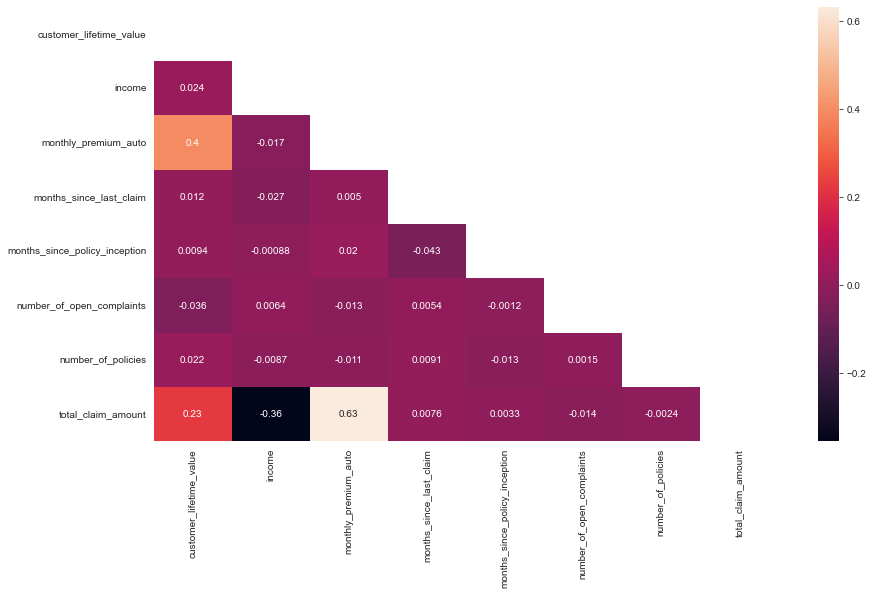

In [10]:
mask=np.zeros_like(customer_df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(14, 8))
ax=sns.heatmap(customer_df.corr(), mask=mask, annot=True)
plt.show()

We identify a negative correlation between the total claim amount and the income.
We also identify positive correlation of total claim amount with the monthly premium auto, meaning that customers who pay a higher premium tend to claim a larger amount

### Step 7 - Visualizing continous variables

In [11]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


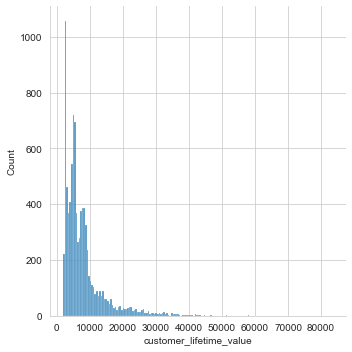

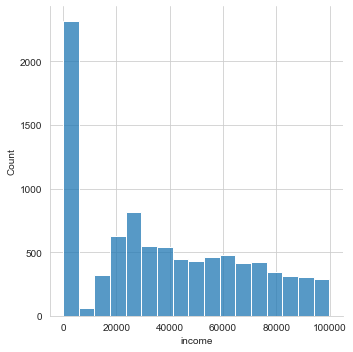

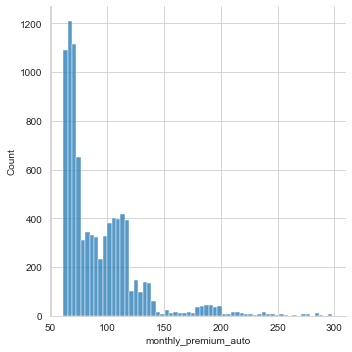

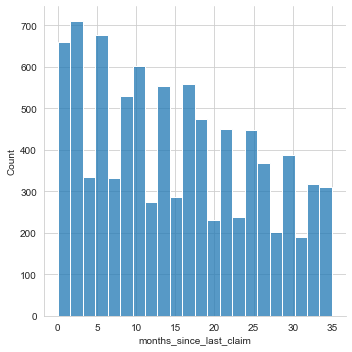

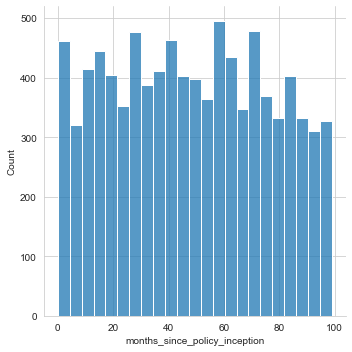

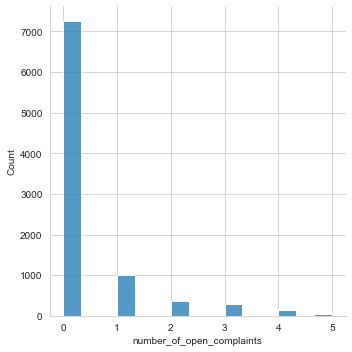

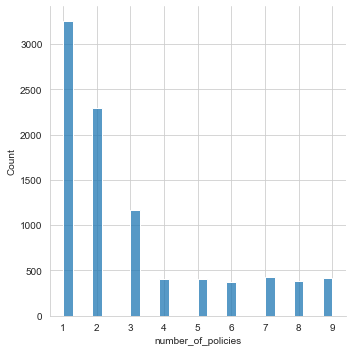

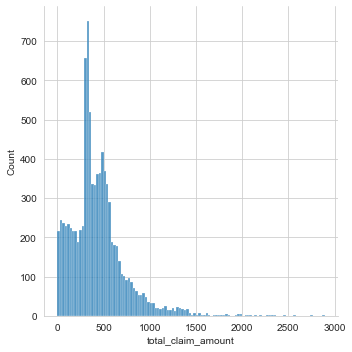

In [12]:
for col in numericals.columns:
    sns.displot(data=numericals, x=col)
    plt.show()

### Step 8 - Visualizing categorical variables

In [13]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


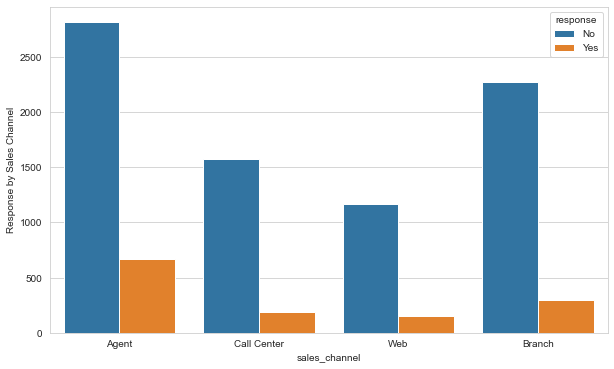

In [14]:
plt.figure(figsize=(10,6))
sns.countplot('sales_channel', hue='response', data=categoricals)
plt.ylabel('Response by Sales Channel')
plt.show()

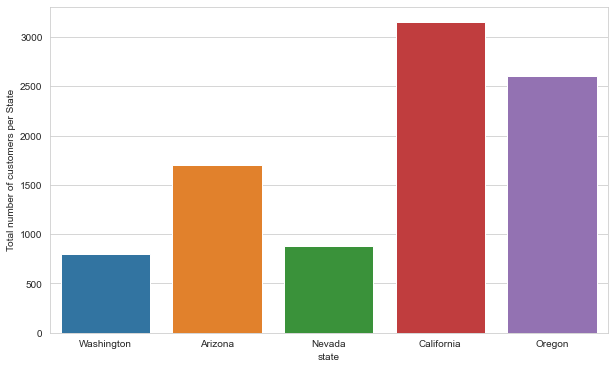

In [15]:
plt.figure(figsize=(10,6))
sns.countplot('state', data=categoricals)
plt.ylabel('Total number of customers per State')
plt.show()

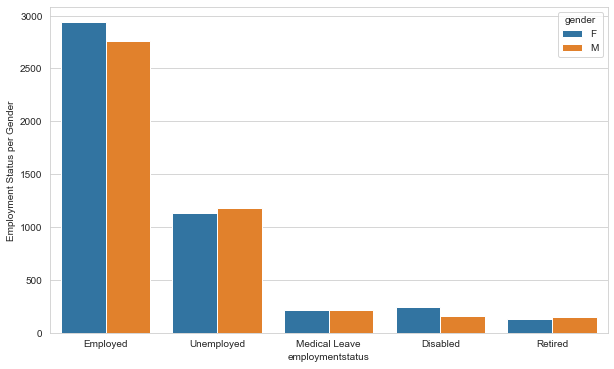

In [16]:
plt.figure(figsize=(10,6))
sns.countplot('employmentstatus', hue='gender', data=categoricals)
plt.ylabel('Employment Status per Gender')
plt.show()

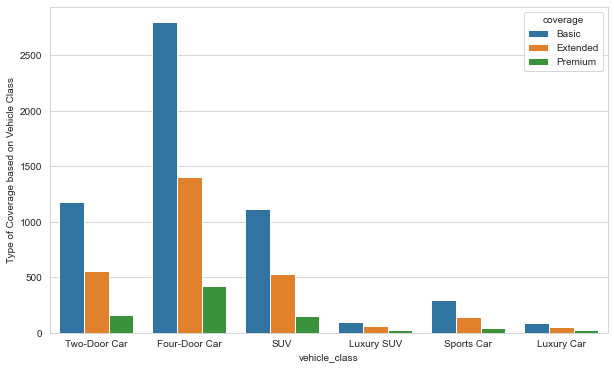

In [17]:
plt.figure(figsize=(10,6))
sns.countplot('vehicle_class', hue='coverage', data=categoricals)
plt.ylabel('Type of Coverage based on Vehicle Class')
plt.show()

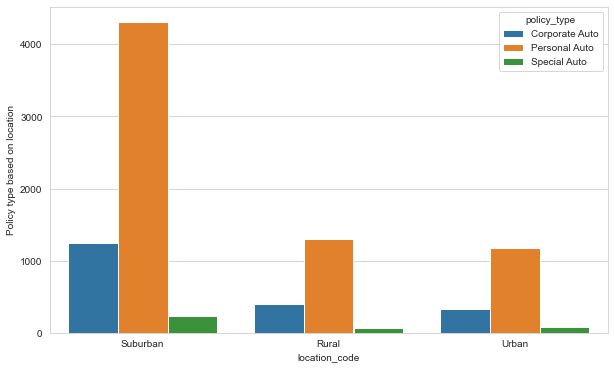

In [18]:
plt.figure(figsize=(10,6))
sns.countplot('location_code', hue='policy_type', data=categoricals)
plt.ylabel('Policy type based on location')
plt.show()

### Step 9 - Identify outliers in continous variables

In [19]:
# We split numerical variables into continous and discrete
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [20]:
continuous = list(numericals.drop(columns = discrete).columns)
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [21]:
continuous_df = numericals.drop(columns = discrete)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


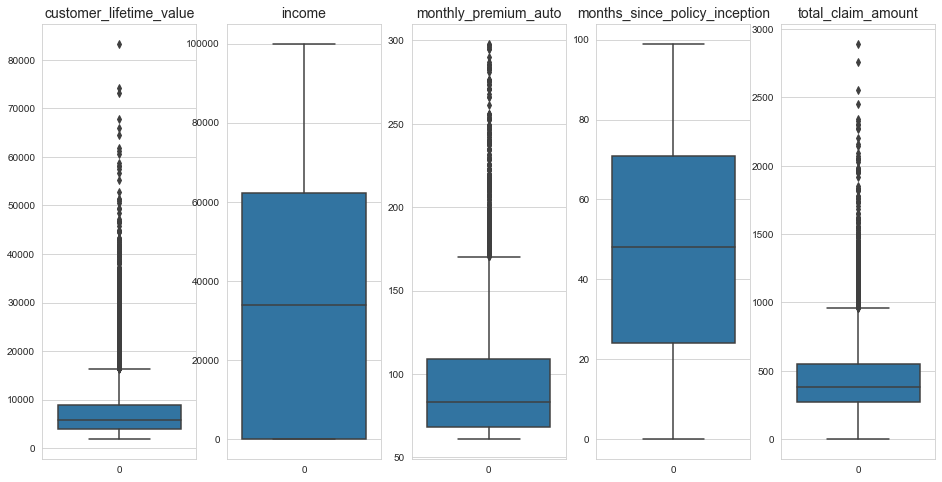

In [22]:
f, ax = plt.subplots(1, 5, figsize=(16,8))

for i, col in enumerate(continuous[:5]):
    sns.boxplot(data = continuous_df[col], ax = ax[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

## Cleaning Categorical Data

In [23]:
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [24]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [25]:
categorical_df = categoricals.drop('customer',axis=1)
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

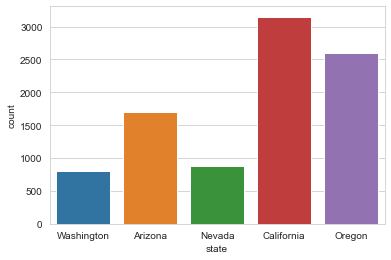

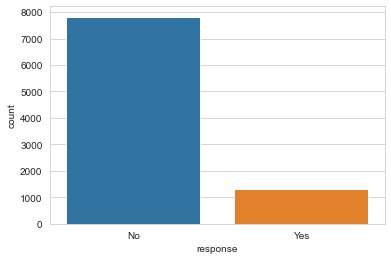

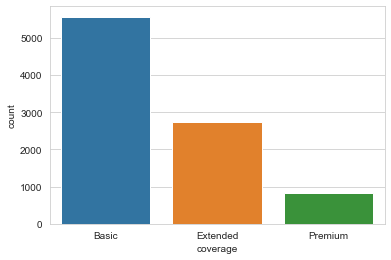

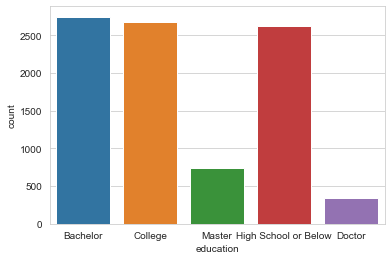

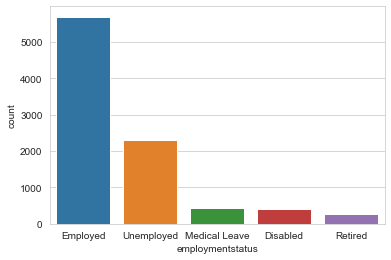

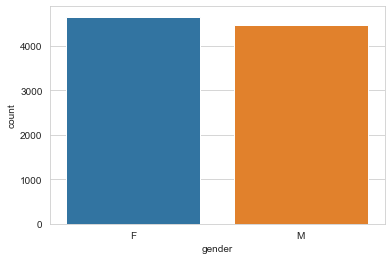

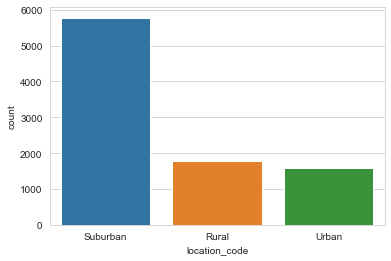

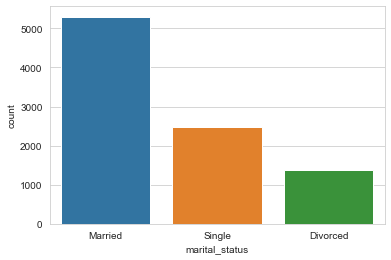

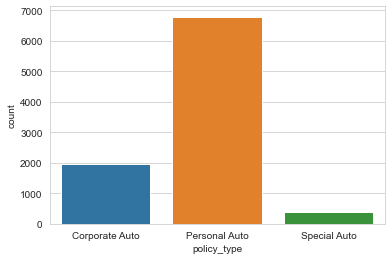

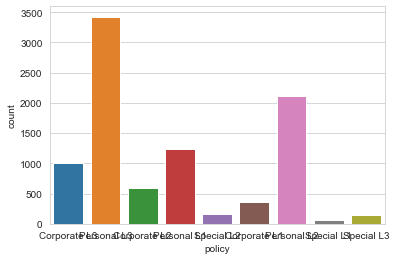

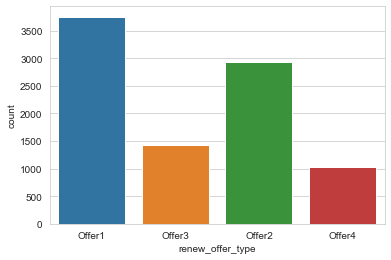

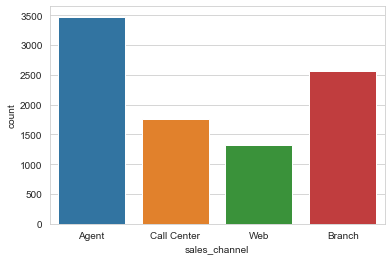

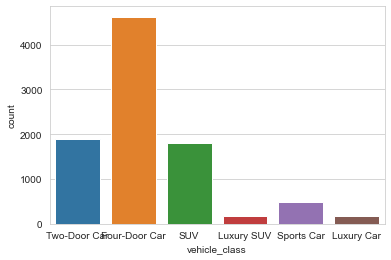

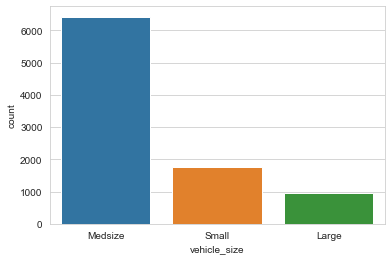

In [26]:
for i, col in enumerate(categorical_df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=categorical_df)
plt.show()

In [27]:
for col in categorical_df.columns:
    print(categorical_df[col].value_counts())
    print("\n")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64


No     7826
Yes    1308
Name: response, dtype: int64


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64


F    4658
M    4476
Name: gender, dtype: int64


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Cor

## Feature extraction

In [28]:
categorical_df = categorical_df.select_dtypes(np.object)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [29]:
categorical_df_clean = categorical_df.drop('policy_type',axis=1)
categorical_df_clean.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

We drop 'policy_type' as it is a grouping layer for column 'policy'

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

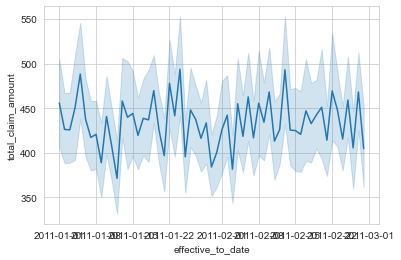

In [30]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df)

We can't appreciate any trend or insight for Total Claim Amount based on date

## Data cleaning and wrangling

### Step 0 - Create a copy of the dataframe for the data wrangling

In [31]:
customer_df.shape

(9134, 24)

In [32]:
data_w = customer_df.copy()
data_w.shape

(9134, 24)

In [33]:
# We separate numericals and categoricals
data_w_num = data_w.select_dtypes(np.number)
data_w_cat = data_w.select_dtypes(np.object)

In [34]:
data_w_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [35]:
data_w_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Step 1 - Remove outliers

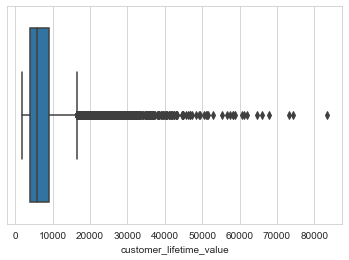

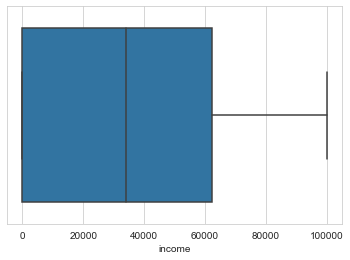

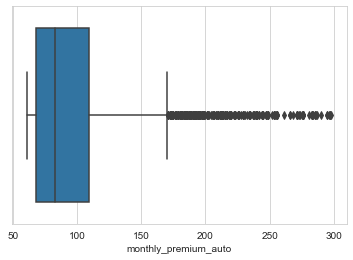

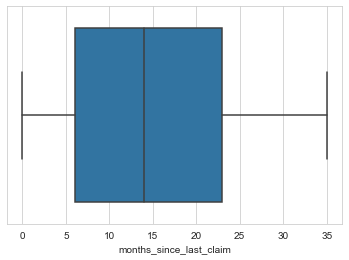

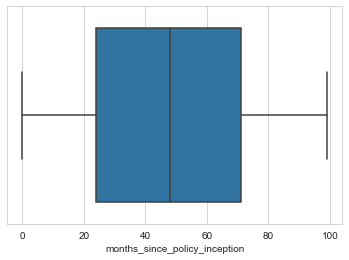

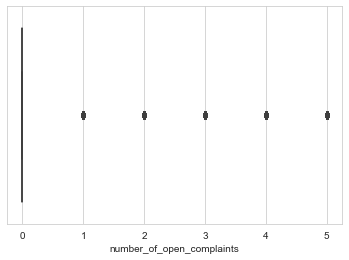

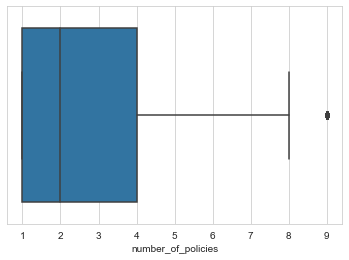

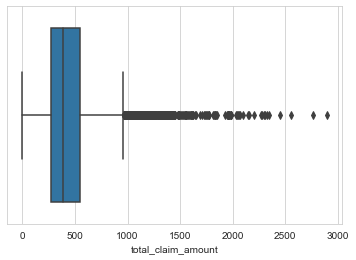

In [36]:
for column in data_w_num.columns:
    sns.boxplot(data_w_num[column])
    plt.show()

From the boxplots above but also from the charts in line 22, we identify outliers for 'total_claim_amount','monthly_premium_auto' and 'customer_lifetime_value'. We will proceed to remove outliers for these variables

In [37]:
for x in ['customer_lifetime_value']:
    q75,q25 = np.percentile(data_w.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_w.loc[data_w[x] < min,x] = np.nan
    data_w.loc[data_w[x] > max,x] = np.nan

In [38]:
for x in ['monthly_premium_auto']:
    q75,q25 = np.percentile(data_w.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_w.loc[data_w[x] < min,x] = np.nan
    data_w.loc[data_w[x] > max,x] = np.nan

In [39]:
for x in ['total_claim_amount']:
    q75,q25 = np.percentile(data_w.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_w.loc[data_w[x] < min,x] = np.nan
    data_w.loc[data_w[x] > max,x] = np.nan

In [40]:
data_w.isnull().sum()

customer                           0
state                              0
customer_lifetime_value          817
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto             430
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount               453
vehicle_class                      0
vehicle_size                       0
dtype: int64

In [41]:
data_w = data_w.dropna(axis = 0)

In [42]:
data_w.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [43]:
data_w.shape

(7847, 24)

### Step 3 - Normalize continuous variables

In [44]:
from sklearn.preprocessing import Normalizer

X = data_w.select_dtypes(np.number)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised, columns = X.columns )

In [45]:
for col in X_normalised.columns:
    data_w[col] = X_normalised[col]

In [46]:
data_w.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,0.049048,No,Basic,Bachelor,2011-02-24,Employed,F,0.998772,Suburban,Married,0.001225,0.000568,0.000089,0.0,0.000018,Corporate Auto,Corporate L3,Offer1,Agent,0.006830,Two-Door Car,Medsize
2,AI49188,Nevada,0.997473,No,Premium,Bachelor,2011-02-19,Employed,F,0.000000,Suburban,Married,0.013829,0.002348,0.008480,0.0,0.000913,Personal Auto,Personal L3,Offer1,Agent,0.069128,Two-Door Car,Medsize
3,WW63253,California,0.064055,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.997940,Suburban,Married,0.001662,0.000273,0.001002,0.0,0.000023,Corporate Auto,Corporate L2,Offer1,Call Center,0.003145,SUV,Medsize
4,HB64268,Washington,0.130140,No,Basic,Bachelor,2011-02-03,Employed,M,0.991491,Rural,Single,0.001088,0.000221,0.001482,0.0,0.000032,Personal Auto,Personal L1,Offer1,Agent,0.002512,Four-Door Car,Medsize
5,OC83172,Oregon,0.096758,Yes,Basic,Bachelor,2011-01-25,Employed,F,0.995290,Rural,Married,0.001205,0.000000,0.000234,0.0,0.000162,Personal Auto,Personal L3,Offer2,Web,0.005783,Two-Door Car,Medsize


### Step 4 - Transform time variables (date)

In [47]:
data_w['effective_to_date'] = pd.to_datetime(data_w['effective_to_date'])

In [48]:
data_w['day'] = list(map(lambda d: d.day,data_w['effective_to_date'] ))
data_w['month']  = list(map(lambda m: m.month,data_w['effective_to_date'] ))
data_w['week_day']  = list(map(lambda w: w.dayofweek,data_w['effective_to_date'] ))
data_w['year']  = list(map(lambda y: y.year,data_w['effective_to_date'] ))
data_w.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,week_day,year
0,BU79786,Washington,0.049048,No,Basic,Bachelor,2011-02-24,Employed,F,0.998772,Suburban,Married,0.001225,0.000568,0.000089,0.0,0.000018,Corporate Auto,Corporate L3,Offer1,Agent,0.006830,Two-Door Car,Medsize,24,2,3,2011
2,AI49188,Nevada,0.997473,No,Premium,Bachelor,2011-02-19,Employed,F,0.000000,Suburban,Married,0.013829,0.002348,0.008480,0.0,0.000913,Personal Auto,Personal L3,Offer1,Agent,0.069128,Two-Door Car,Medsize,19,2,5,2011
3,WW63253,California,0.064055,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.997940,Suburban,Married,0.001662,0.000273,0.001002,0.0,0.000023,Corporate Auto,Corporate L2,Offer1,Call Center,0.003145,SUV,Medsize,20,1,3,2011
4,HB64268,Washington,0.130140,No,Basic,Bachelor,2011-02-03,Employed,M,0.991491,Rural,Single,0.001088,0.000221,0.001482,0.0,0.000032,Personal Auto,Personal L1,Offer1,Agent,0.002512,Four-Door Car,Medsize,3,2,3,2011
5,OC83172,Oregon,0.096758,Yes,Basic,Bachelor,2011-01-25,Employed,F,0.995290,Rural,Married,0.001205,0.000000,0.000234,0.0,0.000162,Personal Auto,Personal L3,Offer2,Web,0.005783,Two-Door Car,Medsize,25,1,1,2011


In [49]:
data_w.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                  float64
location_code                            object
marital_status                           object
monthly_premium_auto                    float64
months_since_last_claim                 float64
months_since_policy_inception           float64
number_of_open_complaints               float64
number_of_policies                      float64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [50]:
data_w.shape

(7847, 28)

### Step 5 - Encode categorical variables

In [51]:
data_w_cat = data_w.select_dtypes(np.object)

In [52]:
data_w_cat.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [53]:
# We drop 'customer' as it is not adding any value in this analysis
data_w_cat = data_w_cat.drop('customer',axis=1)
data_w_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [54]:
for col in data_w_cat.columns:
    print(data_w_cat[col].value_counts())
    print("\n")

California    2700
Oregon        2227
Arizona       1480
Nevada         752
Washington     688
Name: state, dtype: int64


No     6701
Yes    1146
Name: response, dtype: int64


Basic       4937
Extended    2343
Premium      567
Name: coverage, dtype: int64


Bachelor                2353
College                 2340
High School or Below    2200
Master                   644
Doctor                   310
Name: education, dtype: int64


Employed         4973
Unemployed       1897
Medical Leave     375
Disabled          351
Retired           251
Name: employmentstatus, dtype: int64


F    4010
M    3837
Name: gender, dtype: int64


Suburban    4857
Rural       1576
Urban       1414
Name: location_code, dtype: int64


Married     4640
Single      2029
Divorced    1178
Name: marital_status, dtype: int64


Personal Auto     5839
Corporate Auto    1694
Special Auto       314
Name: policy_type, dtype: int64


Personal L3     2937
Personal L2     1830
Personal L1     1072
Corporate L3     876
Cor

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in data_w_cat[["coverage","employmentstatus","location_code","vehicle_size"]]:
    le.fit(data_w_cat[column])
    data_w_cat[column] = le.transform(data_w_cat[column])
    
data_w_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,Bachelor,1,F,1,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1
2,Nevada,No,2,Bachelor,1,F,1,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1
3,California,No,0,Bachelor,4,M,1,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1
4,Washington,No,0,Bachelor,1,M,0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1
5,Oregon,Yes,0,Bachelor,1,F,0,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,1


In [59]:
# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

onehot_encoded = pd.get_dummies(data_w_cat, columns = ['state','marital_status', 'policy_type','policy', 'renew_offer_type','vehicle_class','sales_channel'], drop_first=True)
onehot_encoded.head()

,response,coverage,education,employmentstatus,gender,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,No,0,Bachelor,1,F,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,No,2,Bachelor,1,F,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,No,0,Bachelor,4,M,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,No,0,Bachelor,1,M,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Yes,0,Bachelor,1,F,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


### Final dataframe

In [62]:
data_w_num = data_w.select_dtypes(np.number)
data_w_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'day', 'month', 'week_day', 'year'],
      dtype='object')

In [64]:
onehot_encoded = onehot_encoded.drop(['response','education','gender'],axis=1)
onehot_encoded.columns

Index(['coverage', 'employmentstatus', 'location_code', 'vehicle_size',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web'],
      dtype='object')

In [66]:
final_df = pd.concat([data_w_num, data_w_cat, onehot_encoded], axis = 1 )
final_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,week_day,year,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,coverage,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,24,2,3,2011,Washington,No,0,Bachelor,1,F,1,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,19,2,5,2011,Nevada,No,2,Bachelor,1,F,1,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1,2,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,20,1,3,2011,California,No,0,Bachelor,4,M,1,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1,0,4,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.130140,0.991491,0.001088,0.000221,0.001482,0.0,0.000032,0.002512,3,2,3,2011,Washington,No,0,Bachelor,1,M,0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.096758,0.995290,0.001205,0.000000,0.000234,0.0,0.000162,0.005783,25,1,1,2011,Oregon,Yes,0,Bachelor,1,F,0,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [67]:
final_df.shape

(7847, 55)

## Comparing regression models